['38512.0', '38157.0', '38283.0', '39362.0', '37650.0', '37939.0', '37610.0', '38272.0', '37669.0', '38077.0', '38006.0', '38680.0', '38770.0', '39061.0', '38496.0', '38676.0']


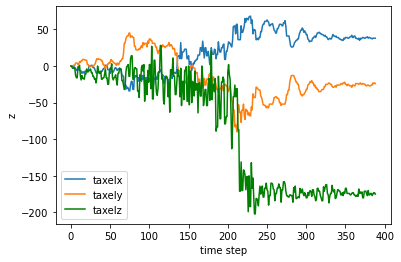

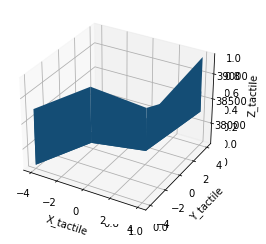

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import plotly.graph_objects as go
import numpy as np
import csv

import pandas as pd

#variables to hold the tactile data

txl1x_noheader = None
txl1y_noheader = None
txl1z_noheader = None

with open('xela_sensor2.csv', 'r') as csvfile:
    readcsv = csv.reader(csvfile, delimiter=',')
    #The above reads all the csv data into readcsv and it
    #reads the data as a string

    txl1x = []
    txl1y = []
    txl1z = []
    
    #To prints out every line of the csvfile read into readcsv =>

    for row in readcsv:

        #To print out the first column of the csvfile read into readcsv
        '''
        Think of row as a placeholder that points to the position of the rows
        of the contents in the csv file; like a placeholder to elements in a list
        '''

        #print(row[0])
        
        '''
        Let's assign the contents of our csv file to some lists

        '''

        txl1x.append (row[0])
        txl1y.append (row[1])
        txl1z.append (row[2])

#Remove the first element of the list 

txl1x_noheader = txl1x [1: len(txl1x)]
txl1y_noheader = txl1y [1: len(txl1y)]
txl1z_noheader = txl1z [1: len(txl1z)]

#Convert the data in the list fromm string to float
for i in range (0, len(txl1x_noheader)):
    txl1x_noheader[i] = float(txl1x_noheader[i])

for i in range (0, len(txl1y_noheader)):
    txl1y_noheader[i] = float(txl1y_noheader[i])

for i in range (0, len(txl1x_noheader)):
    txl1z_noheader[i] = float(txl1z_noheader[i])


#Normalize data 
def normalize (list, first_element):
    store_init = first_element

    for i in range (0, len(list)):
        list[i] -= store_init

normalize(txl1x_noheader, txl1x_noheader[0])
normalize(txl1y_noheader, txl1y_noheader[0])
normalize(txl1z_noheader, txl1z_noheader[0]) 

#Print the data according to its time step

listx = []
listy = []
listz = []

#Function to record the time step for each x,y,z taxel
def record_timestep (list_type, list_type_timestep):
    for i in range (0, len(list_type)):
        list_type_timestep.append(i)

record_timestep(txl1x_noheader, listx)
record_timestep(txl1y_noheader, listy)
record_timestep(txl1z_noheader, listz)



#plot the data
plt.plot (listx, txl1x_noheader, label = 'taxelx')
plt.plot (listy, txl1y_noheader, label = 'taxely')
plt.plot (listz, txl1z_noheader, label = 'taxelz', color = 'g')

#label the data
plt.xlabel("time step")
plt.ylabel("z")
plt.legend()

#plot 3d data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel ("X_tactile")
ax.set_ylabel ("Y_tactile")
ax.set_zlabel ("Z_tactile")


#read the z-data of a single row
with open ('xela_sensor2.csv', 'r') as csvfile2:
    readcsv2 = csv.reader(csvfile2, delimiter=',')
     #create a flag
    fy = 1
    count = 0
    txz = []
    for row in readcsv2:
        x = 2 
        if fy:
            while (x < len(row)):
               # print (row [x])
                txz.append (row[x]) #append the tactile z-data of the rows
                x = x + 3 
                
            count += 1 #hold the number of rows gone through.
            if (count == 2): 
                fy = 0 #If the first and second rows are read, set flag fy to 0
zz =  txz[16:]

print (zz)

#Mesh Plot
xx = np.linspace (-4, 4, 4)
yy = np.linspace (-4, 4, 4)

zzreshape = np.reshape(np.array(zz), (4, 4))

#plot the 3d surface of the data
ax.plot_surface(X=xx, Y=yy, Z=zzreshape)




In [2]:
""" pts = np.loadtxt(np.DataSource().open('zdata.txt'))
x, y, z = pts.T

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='pink', opacity=0.50)])
fig.show()

plt.show()


#create a 2d array of zz
def nest_list(list1,rows, columns):    
        result=[]               
        start = 0
        end = columns
        for i in range(rows): 
            result.append(list1[start:end])
            start +=columns
            end += columns
        return result

td_array = nest_list(zz ,8, 2)


#CONVERT TO a numpy array
np_td_array = np.array(td_array)

#Transpose the array 
t_np_td_array = np.transpose(np_td_array)



xal = xx.tolist()
yal = yy.tolist()

yal.reverse()

#write the data to a file
with open('zdata.txt', 'w') as fp:
    for i in range(0, len(xal)):
        xal [i] = str(xal[i])
        yal [i] = str(yal[i])
        zz [i] = str(zz[i]) 
        fp.write(xal[i])
        fp.write(' ') 
        fp.write(yal[ i])
        fp.write(' ') 
        fp.write ("%s\n" % zz[i])

 """


' pts = np.loadtxt(np.DataSource().open(\'zdata.txt\'))\nx, y, z = pts.T\n\nfig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color=\'pink\', opacity=0.50)])\nfig.show()\n\nplt.show()\n\n\n#create a 2d array of zz\ndef nest_list(list1,rows, columns):    \n        result=[]               \n        start = 0\n        end = columns\n        for i in range(rows): \n            result.append(list1[start:end])\n            start +=columns\n            end += columns\n        return result\n\ntd_array = nest_list(zz ,8, 2)\n\n\n#CONVERT TO a numpy array\nnp_td_array = np.array(td_array)\n\n#Transpose the array \nt_np_td_array = np.transpose(np_td_array)\n\n\n\nxal = xx.tolist()\nyal = yy.tolist()\n\nyal.reverse()\n\n#write the data to a file\nwith open(\'zdata.txt\', \'w\') as fp:\n    for i in range(0, len(xal)):\n        xal [i] = str(xal[i])\n        yal [i] = str(yal[i])\n        zz [i] = str(zz[i]) \n        fp.write(xal[i])\n        fp.write(\' \') \n        fp.write(yal[ i])\n        fp.w